In [2]:
import pandas as pd
import numpy as np
import re

In [4]:
twit = pd.read_csv('train.csv')

In [5]:
twit.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#twit['text']

In [6]:
import spacy

In [125]:
twit['text_processed'] = (twit['text'].map(lambda x: re.sub("#@",'', x)))

In [8]:
twit.head()

,id,keyword,location,text,target,text_processed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


In [9]:
twit['text_processed'][0]

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'

In [200]:
train_df = twit.drop(columns = ['id','keyword','location','text_processed'])

In [201]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [167]:
train_df.shape

(7613, 2)

In [13]:
import seaborn as sns

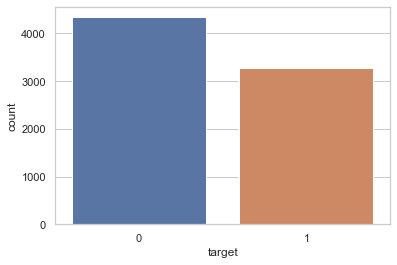

In [14]:
sns.set(style="whitegrid")

ax = sns.countplot(x="target", data=train_df)

In [202]:
pd.value_counts(train_df['target'])

0    4342
1    3271
Name: target, dtype: int64

In [203]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [204]:
train_df['text'] = train_df['text'].str.lower()

In [205]:
train_df['text'][0]

'our deeds are the reason of this #earthquake may allah forgive us all'

In [26]:
y_train.head()

1642    0
1386    0
6905    0
4895    1
3300    0
Name: target, dtype: int64

In [206]:
def remove_numbers(text):
    text = re.sub('\d\d','',text)
    text = re.sub('\W',' ',text)
    return text

In [207]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r' ',text)

In [208]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600 - \U0001F64F"
                               u"\U0001F300 - \U0001F5FF"
                               u"\U0001F680 - \U0001F6FF"
                               u"\U0001F1E0 - \U0001F1FF"
                               u"\U00002702 - \U000027B0"
                               u"\U000024C2 - \U0001F251"
                               
                               "]+",flags = re.UNICODE)
    return emoji_pattern.sub(r' ',text)

In [195]:
#train_df['text'] = train_df['text'].apply(remove_numbers)

In [209]:
train_df['text'] = train_df['text'].apply(remove_URL)

In [210]:
train_df['text'] = train_df['text'].apply(remove_emoji)

In [186]:
train_df['text'] = train_df['text'].map(lambda x: re.sub("#@?'\\''",'', x))

In [74]:
X_train.head()

,text,target
1642,@gorpuazikinakandtongueoutasshecollapsedinthec...,0
1386,tedcruzfiresbackatjeb&amp;bush:ûïwelosebecaus...,0
6905,@kushwushi'mstilltraumatisedbyyourdriving.havi...,0
4895,headedtothemassacre\nbodiesarrivingeveryday\nw...,1
3300,cancelthefuckingshow.evacuatemetlifehttps://t....,0


In [75]:
X_train['text'][3300]

'cancelthefuckingshow.evacuatemetlifehttps://t.co/skqoucmr'

In [211]:
twit['text'][1386]

'Ted Cruz fires back at Jeb &amp; Bush: \x89ÛÏWe lose because of Republicans like Jeb &amp; Mitt.\x89Û\x9d [Video] http://t.co/FgDEh56PLO'

In [214]:
train_df['text'][1386]

'ted cruz fires back at jeb  amp  bush   ûïwe lose because of republicans like jeb  amp  mitt  û   video  '

In [213]:
train_df['text'] = train_df['text'].apply(remove_numbers)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_df,train_df['target'],test_size=0.3, random_state=1)

In [122]:
X_train.head()

,text,target
1642,@gorpuazikinak and tongue out as she collapsed...,0
1386,ted cruz fires back at jeb &amp; bush: ûïwe l...,0
6905,@kushwush i'm still traumatised by your drivin...,0
4895,headed to the massacre \nbodies arriving every...,1
3300,cancel the fucking show. evacuate metlife,0


In [123]:
twit['text'][1386]

'Ted Cruz fires back at Jeb &amp; Bush: \x89ÛÏWe lose because of Republicans like Jeb &amp; Mitt.\x89Û\x9d [Video] http://t.co/FgDEh56PLO'

In [124]:
X_train['text'][1386]

'ted cruz fires back at jeb &amp; bush: \x89ûïwe lose because of republicans like jeb &amp; mitt.\x89û\x9d [video] '

In [161]:
a = "the 12 people @townhall has taken 2500 dollors. #robbery"

In [162]:
type(a)

str

In [163]:
a = re.sub('\d\d','',a)
a = re.sub('\W',' ',a)

In [164]:
a

'the  people  townhall has taken  dollors   robbery'

In [216]:
train_df['text'][1642]

' gorpuazikinak and tongue out as she collapsed in the cum puddle her whole body covered '